In [74]:
#import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.fft import fft
from bokeh.plotting import figure, show
# output to static HTML file
output_file("line.html")
import panel as pn

In [203]:
#import dataset 1 and generate 2 plots
data=pd.read_csv('dataset1.csv')
data.head()

d        f1        f2   t0
0  0.631189  5.631189  2.931189  0.0
1  0.355074  6.394632  3.365813  0.1
2  0.997003  8.030686  4.648909  0.2
3  0.224171  8.163098  4.384911  0.3
4  0.652451  9.368175  5.139881  0.4

In [220]:
d=data[['d']]
f1=data[['f1']]
f2=data[['f2']]
t0=data[['t0']]

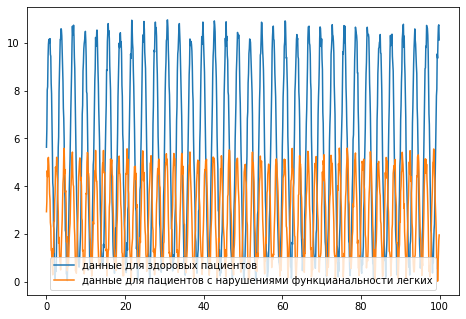

In [237]:
fig1 = plt.figure()
ax = fig1.add_axes([0.1, 0.1, 1 ,1])
ax.plot(t0,f1, label = 'данные для здоровых пациентов');
ax.plot(t0,f2, label = 'данные для пациентов c нарушениями функцианальности легких');
plt.legend(loc='lower center')
p1 = pn.pane.plot.Matplotlib(fig1, dpi = 80,align = 'center', sizing_mode='stretch_width')
                             

Matplotlib(Figure, align='center', dpi=80, sizing_mode='stretch_width')
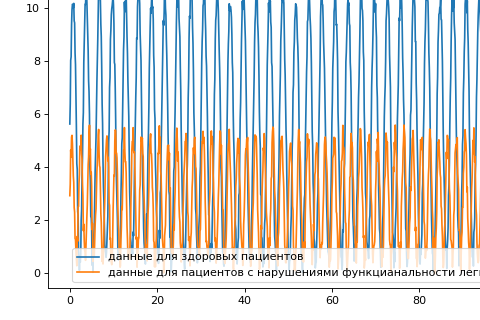

In [238]:
p1

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



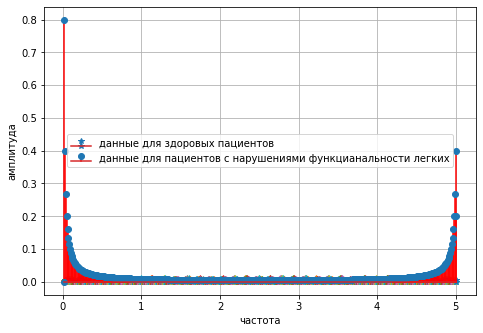

In [240]:
Fd, N = 10,1000
T=1/Fd
z1= f1-np.mean(f1)
z2= f2-np.mean(f2)
Y=fft(z1)
P2=abs(Y/N)
k=(N/2)+1
k=int(k)
P1 = P2[0:k]
P1[1:-2]=2*P1[1:-2]
k2=(np.arange(1,k+1))/N
f = Fd*k2
px = 1/plt.rcParams['figure.dpi']
fig2 = plt.figure()
ax2 = fig2.add_axes([0.1, 0.1, 1, 1])
ax2.stem(f,P1,'-*','b',label = 'данные для здоровых пациентов',use_line_collection=False);

Y2 = fft(z2);
P4 = abs(Y2/N);
k3=(N/2)+1
k3=int(k3)
P3 = P4[0:k3];
P3[1:-2] = 2*P3[1:-2]
k4=(np.arange(1,k3+1))/N
f2 = Fd*k4
ax2.stem(f2, P3 ,'r',label ='данные для пациентов c нарушениями функцианальности легких',use_line_collection=False);
plt.legend()
plt.grid()
plt.xlabel('частота')
plt.ylabel('амплитуда')
plt.legend(loc='center')

Matplotlib(Figure, align='center', dpi=80, sizing_mode='stretch_width')
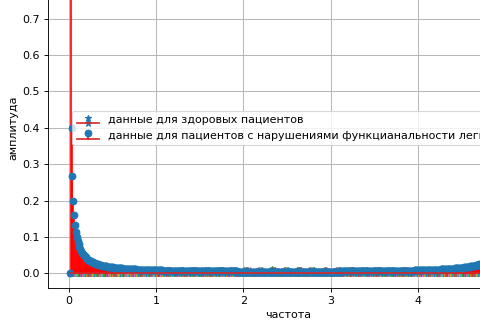

In [241]:
p2 = pn.pane.plot.Matplotlib(fig2, dpi = 80, align = 'center', sizing_mode='stretch_width')
p11 = pn.pane.plot.Matplotlib(fig2, width = 300, height = 300)
p2

In [259]:
#load the second dataset
data2 = pd.read_fwf('dataset.txt',header=None)
data2.columns=['a','b','c']
data2.head()

a    b   c
0  44  122  66
1  44  118  62
2  42  114  58
3  41  112  54
4  39  110  50

In [296]:
ECG.values[1][0]

44

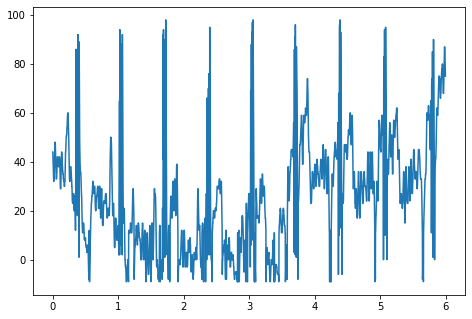

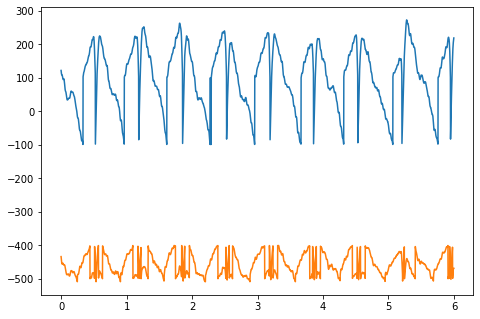

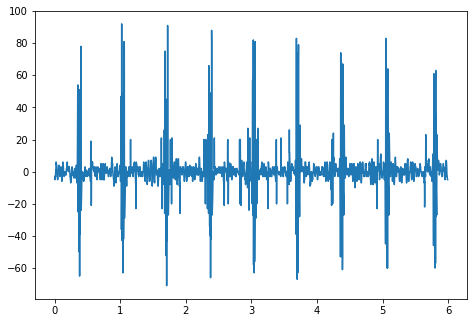

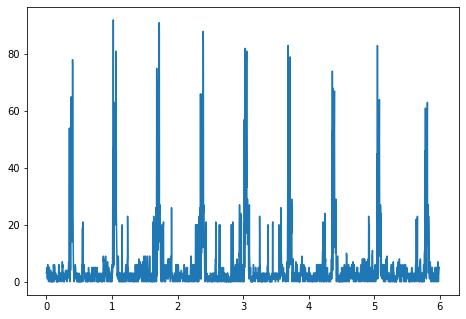

In [301]:
N = data2.shape
N = N[0]
Fs = 500
T=1/Fs
tmax = N/Fs
t= np.arange(0,tmax-T+1,T)
ECG = data2[['a']]
Puls_R = data2[['b']]
Puls_IR = data2[['c']]

C= 500

fig3 = plt.figure()
ax3 = fig3.add_axes([0.1, 0.1, 1, 1])
ax3.plot(t[0:len(ECG)],ECG);
l=len(ECG)
fig4 = plt.figure()
ax4 = fig4.add_axes([0.1, 0.1, 1, 1])
ax4.plot(t[0:len(Puls_R)],Puls_R);
ax4.plot(t[0:l],Puls_IR-C);

Y=[]
ECG_dif=[]
for i in range(3,N):
    Y.append(ECG.values[i][0]-ECG.values[i-2][0])
    y=Y[-1]
    ECG_dif.append(abs(y))
    
fig5 = plt.figure()
ax5=fig5.add_axes([0.1,0.1,1,1])
ax5.plot(t[0:len(Y)],Y);

fig6 = plt.figure()
ax6=fig6.add_axes([0.1,0.1,1,1])
ax6.plot(t[0:len(ECG_dif)],ECG_dif);

In [306]:
p3 = pn.pane.plot.Matplotlib(fig3, width = 300, height = 300)
p4 = pn.pane.plot.Matplotlib(fig4, width = 300, height = 300)
p5 = pn.pane.plot.Matplotlib(fig5, width = 300, height = 300)
p6 = pn.pane.plot.Matplotlib(fig6, width = 300, height = 300)

In [325]:
Puls_R.values[QRS[2]][0]

112

In [340]:
Jmax,k = 100,0
j=Jmax
QRS=[]
m1=[]
m2=[]
for i in range(1,N-3):
    j= j+1
    if (ECG_dif[i]>20) and (j>Jmax):
        k=k+1
        QRS.append(k)
        j=0
D1 , D2 = 0 , 0
for i in range(1,k-1):
    m1.append(Puls_R.values[QRS[i]][0])
    m1.append(Puls_R.values[QRS[i+1]][0])
    m2.append(Puls_IR.values[QRS[i]][0])
    m2.append(Puls_IR.values[QRS[i+1]][0])
    D1= D1+ (max(m1)-min(m1))
    D2= D2+ (max(m2)-min(m2))
D1=D1/(k-1)
D2=D2/(k-1)
a=D2/D1
val = (0.872-0.16*a)*100/(0.14*1+0.754)+20
val=round(val,2)
val

92.26

In [341]:
w1 = pn.widgets.TextInput(name='SaO2', value=str(val),width = 150, align = 'center')
w1

TextInput(align='center', name='SaO2', value='92.26', width=150)

In [342]:
def showReport(p1,p2,p3,p4,p5,p6,wig):
    import panel as pn
    pn.extension()
    template = pn.template.FastListTemplate(title ='Health Report',
                                            
    main=[pn.Row('## Spirometer',pn.Spacer(width = 175),
                 pn.Column(p1),pn.Spacer(width = 20), 
                 pn.Column(p2), sizing_mode='stretch_width',height = 350, width = 800),
          
          pn.Row('## Pulse Oximeter',
                 p3,pn.Spacer(width = 10),
                 p4,pn.Spacer(width = 10),
                 p5,pn.Spacer(width = 10),
                 p6,pn.Spacer(width = 10),
                 wig,
                 sizing_mode='stretch_width',
                 height = 350, width = 850)
          ]
      )
    template.servable();
    print('Designing done')
    template.show()

In [345]:
showReport(p1,p2,p3,p5,p6,p4,w1)

Designing done
Launching server at http://localhost:38753
